In [1]:
# Dependencies
import os
import pathlib
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from uszipcode import SearchEngine

/Users/natalia/anaconda3/envs/intro_python_requirements_osx/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# Study data files
last_path = "./data/merged_df_cleaned1806.csv"

In [3]:
# Read the brewery data and the study results
last_df = pd.read_csv(last_path, index_col="City")

In [4]:
# Display dataframe
last_df.head()

,name,brewery_type,address_1,State,postal_code,longitude,latitude,state_x,zip_code,brewery_id,...,income_household_median,income_family_median,income_nonfamily_median,earnings_median,employment_total,employment_male,employment_female,occupancy_status_total,occupancy_status_occupied,occupancy_status_vacant
City,,,,,,,,,,,,,,,,,,,,,
Norman,(405) Brewing Co,micro,1716 Topeka St,Oklahoma,73069-8224,-97.468182,35.257389,Oklahoma,73069.0,1,...,71963.0,59063.0,28261.0,31076.0,18444.0,44975.0,46495.0,57307.0,53446.0,3861.0
San Diego,10 Barrel Brewing Co,large,1501 E St,California,92101-6618,-117.129593,32.714813,California,92101.0,3,...,93042.0,107093.0,74377.0,48579.0,1150367.0,502249.0,457320.0,555456.0,521000.0,34456.0
Bend,10 Barrel Brewing Co,large,62970 18th St,Oregon,97701-9847,-121.281706,44.086835,Oregon,97701.0,4,...,55398.0,86510.0,37802.0,49717.0,32362.0,32384.0,30907.0,47882.0,44620.0,3262.0
Bend,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,Oregon,97703-2465,-121.328802,44.057565,Oregon,97703.0,5,...,55398.0,86510.0,37802.0,49717.0,32362.0,32384.0,30907.0,47882.0,44620.0,3262.0
Portland,10 Barrel Brewing Co,large,1411 NW Flanders St,Oregon,97209-2620,-122.685506,45.525979,Oregon,97209.0,6,...,36125.0,79590.0,40542.0,46590.0,50737.0,229443.0,227784.0,303483.0,286734.0,16749.0


In [5]:
last_df.columns

Index(['name', 'brewery_type', 'address_1', 'State', 'postal_code',
       'longitude', 'latitude', 'state_x', 'zip_code', 'brewery_id', 'NAME',
       'state_y', 'place', 'population_total', 'population_male',
       'population_female', 'population_median_age',
       'population_median_age_male', 'population_median_age_female',
       'population_total_2', 'population_18_to_24', 'population_25_to_34',
       'population_35_to_44', 'population_45_to_54', 'population_55_to_64',
       'income_household', 'income_household_median', 'income_family_median',
       'income_nonfamily_median', 'earnings_median', 'employment_total',
       'employment_male', 'employment_female', 'occupancy_status_total',
       'occupancy_status_occupied', 'occupancy_status_vacant'],
      dtype='object')

In [10]:
# Plot Demographics per state and city (MultiIndex)
SummaryCities_df = last_df.groupby(['State', 'City'])[['population_total','population_male',  'population_female', 'population_median_age',
       'population_median_age_male', 'population_median_age_female', 'population_total_2','population_18_to_24','population_25_to_34','population_35_to_44','population_45_to_54','population_55_to_64','income_household', 'income_household_median','income_family_median','income_nonfamily_median','earnings_median','employment_total','employment_male' , 'employment_female','occupancy_status_total', 'occupancy_status_occupied', 'occupancy_status_vacant']].mean()
SummaryCities_df

population_total  population_male  population_female   
State   City                                                                 
Alabama Alabaster              33670.0          16058.0            17612.0  \
        Anniston               21545.0           9639.0            11906.0   
        Birmingham            196410.0          94696.0           101714.0   
        Decatur                57754.0          28253.0            29501.0   
        Dothan                 71283.0          33706.0            37577.0   
...                                ...              ...                ...   
Wyoming Cheyenne               65048.0          31310.0            33738.0   
        Gillette               33061.0          17614.0            15447.0   
        Laramie                28531.0          14477.0            14054.0   
        Rock Springs           20787.0          10991.0             9796.0   
        Sheridan               20724.0           9987.0            10737.0   

                      population_median_age  population_median_age_male   
State   City                                                              
Alabama Alabaster                      42.0                        42.4  \
        Anniston                       42.4                        41.8   
        Birmingham                     37.2                        32.9   
        Decatur                        42.1                        42.1   
        Dothan                         40.5                        38.9   
...                                     ...                         ...   
Wyoming Cheyenne                       39.3                        39.7   
        Gillette                       36.0                        36.2   
        Laramie                        28.3                        29.3   
        Rock Springs                   37.4                        37.3   
        Sheridan                       38.6                        39.8   

                      population_median_age_female  population_total_2   
State   City                                                             
Alabama Alabaster                             40.7             33670.0  \
        Anniston                              43.1             21545.0   
        Birmingham                            40.1            196410.0   
        Decatur                               42.1             57754.0   
        Dothan                                42.2             71283.0   
...                                            ...                 ...   
Wyoming Cheyenne                              38.4             33061.0   
        Gillette                              35.3             28531.0   
        Laramie                               27.0             20787.0   
        Rock Springs                          37.6             20724.0   
        Sheridan                              38.3             41914.0   

                      population_18_to_24  population_25_to_34   
State   City                                                     
Alabama Alabaster                  2231.0               3222.0  \
        Anniston                   2375.0               2276.0   
        Birmingham                23198.0              31770.0   
        Decatur                    4089.0               7244.0   
        Dothan                     5751.0               8946.0   
...                                   ...                  ...   
Wyoming Cheyenne                   1110.0               4962.0   
        Gillette                   9740.0               4821.0   
        Laramie                    2045.0               2970.0   
        Rock Springs               2097.0               2177.0   
        Sheridan                   4840.0               3435.0   

                      population_35_to_44  ...  income_household_median   
State   City                               ...                            
Alabama Alabaster                  5060.0  ...             

In [11]:
# Plot Summary per state
Summary_df = last_df.groupby('State')[['population_total','population_male',  'population_female', 'population_median_age',
       'population_median_age_male', 'population_median_age_female', 'population_total_2','population_18_to_24','population_25_to_34','population_35_to_44','population_45_to_54','population_55_to_64','income_household', 'income_household_median','income_family_median','income_nonfamily_median','earnings_median','employment_total','employment_male' , 'employment_female','occupancy_status_total', 'occupancy_status_occupied', 'occupancy_status_vacant']].mean()
Summary_df

,population_total,population_male,population_female,population_median_age,population_median_age_male,population_median_age_female,population_total_2,population_18_to_24,population_25_to_34,population_35_to_44,...,income_household_median,income_family_median,income_nonfamily_median,earnings_median,employment_total,employment_male,employment_female,occupancy_status_total,occupancy_status_occupied,occupancy_status_vacant
State,,,,,,,,,,,,,,,,,,,,,
Alabama,1.354198e+05,6.566439e+04,6.975539e+04,37.355263,35.334211,39.007895,135419.789474,15561.631579,20733.763158,17560.210526,...,56452.236842,72843.184211,3.918626e+04,37058.578947,110321.342105,4.302618e+04,4.504195e+04,6.738192e+04,5.840645e+04,8975.473684
Alaska,2.113497e+05,1.081875e+05,1.031622e+05,35.580000,34.510000,36.120000,211349.700000,20294.900000,34768.000000,31230.300000,...,82591.500000,103638.500000,4.803240e+04,41853.800000,165856.200000,7.170450e+04,6.715160e+04,8.815370e+04,8.055660e+04,7597.100000
Arizona,4.956868e+05,2.485697e+05,2.471171e+05,37.696262,37.060748,38.342991,446381.672897,45879.093458,70466.794393,59939.579439,...,71187.943925,87112.766355,4.713595e+04,40389.383178,396322.878505,1.666152e+05,1.618841e+05,2.079479e+05,1.922823e+05,15665.570093
Arkansas,1.114171e+05,5.315462e+04,5.826244e+04,34.664706,33.982353,35.017647,41567.705882,5237.205882,5703.352941,5011.911765,...,59020.205882,73462.411765,3.068438e+04,36750.264706,87850.117647,3.510415e+04,3.720391e+04,5.276965e+04,4.713650e+04,5633.147059
California,5.236191e+05,2.638434e+05,2.597757e+05,37.509241,36.566621,38.566345,71981.586207,6548.404138,10584.028966,10010.820690,...,93356.617931,110188.357241,-8.623454e+05,48253.955862,433147.233103,1.838463e+05,1.748875e+05,2.100992e+05,1.940117e+05,16087.492414
Colorado,3.213297e+05,1.615129e+05,1.598168e+05,35.859935,35.297394,36.448534,49637.006515,4968.449511,7434.605863,7221.687296,...,82940.013029,109274.263844,4.750764e+04,44702.188925,266444.592834,1.153266e+05,1.096616e+05,1.511754e+05,1.416334e+05,9541.996743
Connecticut,9.512182e+04,4.648900e+04,4.863282e+04,36.254545,34.786364,37.886364,53694.318182,5838.772727,7669.863636,6765.363636,...,61391.909091,76848.545455,4.872050e+04,36002.863636,77687.045455,3.199077e+04,3.223141e+04,4.183245e+04,3.773627e+04,4096.181818
Delaware,4.713892e+04,2.323592e+04,2.390300e+04,35.183333,32.908333,36.250000,309976.250000,31288.333333,65430.666667,50143.166667,...,57607.750000,97688.916667,5.430917e+04,33580.916667,40072.333333,1.664742e+04,1.554858e+04,2.230117e+04,1.957100e+04,2730.166667
District of Columbia,6.700500e+05,3.190250e+05,3.510250e+05,34.800000,34.700000,35.000000,95779.000000,13294.000000,15015.000000,9033.000000,...,90088.000000,136184.000000,4.628800e+04,72457.000000,553437.000000,2.241980e+05,2.436240e+05,3.574820e+05,3.195650e+05,37917.000000


Text(0, 0.5, 'Population')

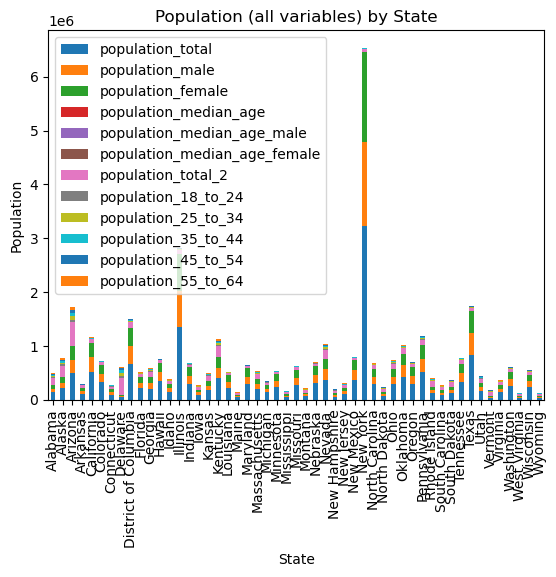

In [12]:
# Population per State
Summary_df.plot(kind='bar', y=['population_total', 'population_male',
       'population_female', 'population_median_age',
       'population_median_age_male', 'population_median_age_female',
       'population_total_2', 'population_18_to_24', 'population_25_to_34',
       'population_35_to_44', 'population_45_to_54', 'population_55_to_64',], stacked=True)
plt.title('Population (all variables) by State')
plt.xlabel('State')
plt.ylabel('Population')

Text(0, 0.5, 'Population')

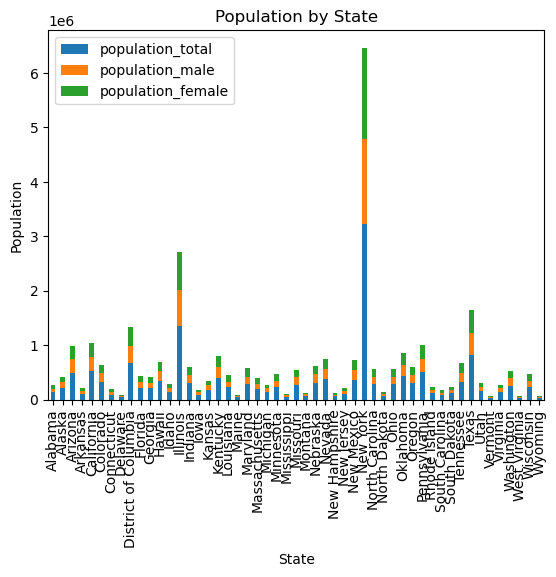

In [13]:
# Populaton by state (tot, male, female)
Summary_df.plot(kind='bar', y=['population_total', 'population_male',
       'population_female'], stacked=True)
plt.title('Population by State')
plt.xlabel('State')
plt.ylabel('Population')

In [14]:
# Filter topState
topState= Summary_df.loc['California', ['population_total', 'population_male', 'population_female']]
topState

population_total     523619.052414
population_male      263843.351724
population_female    259775.700690
Name: California, dtype: float64

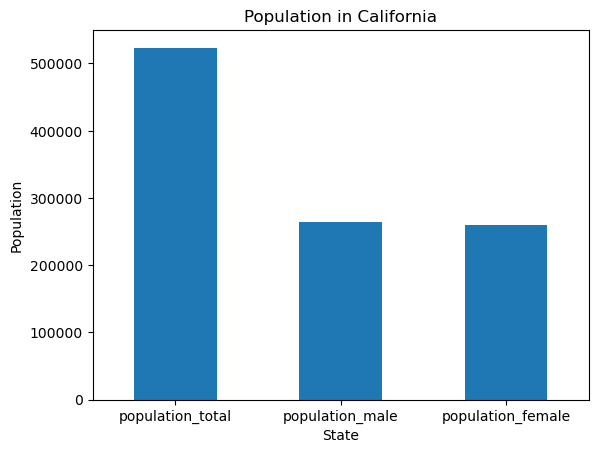

In [15]:
topState.plot(kind='bar', y=['population_total', 'population_male',
       'population_female'], stacked=True)
plt.title('Population in California')
plt.xlabel('State')
plt.ylabel('Population')
plt.xticks(rotation=0, ha='center')
plt.savefig("./data/plotCalifornia.png")

In [16]:
# Filter Cities in topState
topcities = SummaryCities_df.loc[['California'],:]
topcities

population_total  population_male   
State      City                                                 
California Alameda                   76352.0          37267.0  \
           Aliso Viejo               51829.0          25155.0   
           American Canyon           23371.0          11580.0   
           Anaheim                  345935.0         168784.0   
           Apple Valley              76217.0          39795.0   
...                                      ...              ...   
           Windsor                   26040.0          13296.0   
           Woodland                  61391.0          28925.0   
           Yorba Linda               67992.0          32443.0   
           Yuba City                 69544.0          36080.0   
           Yucaipa                   54739.0          24163.0   

                            population_female  population_median_age   
State      City                                                        
California Alameda                    39085.0                   40.6  \
           Aliso Viejo                26674.0                   37.3   
           American Canyon            11791.0                   38.7   
           Anaheim                   177151.0                   37.2   
           Apple Valley               36422.0                   36.8   
...                                       ...                    ...   
           Windsor                    12744.0                   44.1   
           Woodland                   32466.0                   36.6   
           Yorba Linda                35549.0                   45.4   
           Yuba City                  33464.0                   36.5   
           Yucaipa                    30576.0                   34.8   

                            population_median_age_male   
State      City                                          
California Alameda                                39.9  \
           Aliso Viejo                            37.2   
           American Canyon                        35.3   
           Anaheim                                36.6   
           Apple Valley                           36.8   
...                                                ...   
           Windsor                                40.2   
           Woodland                               35.3   
           Yorba Linda                            46.1   
           Yuba City                              34.1   
           Yucaipa                                38.6   

                            population_median_age_female  population_total_2   
State      City                                                                
California Alameda                                  41.5             21056.0  \
           Aliso Viejo                              37.5             46510.0   
           American Canyon                          40.3            345935.0   
           Anaheim                                  37.9             44991.0   
           Apple Valley                             36.8             55335.0   
...                                                  ...                 ...   
           Windsor                                  49.9             61391.0   
           Woodland                                 37.4             67992.0   
           Yorba Linda                              44.6             69544.0   
           Yuba City                                39.8             54739.0   
           Yucaipa                                  33.3             21140.0   

                            population_18_to_24  population_25_to_34   
State      City                                                        
California Alameda                       1045.0               2939.0  \
           Aliso Viejo                   2916.0               3980.0   
           American Canyon              30526.0              54439.0   
           Anaheim                       2674.0               4298.0   
           Apple 

In [17]:
# FIlter top 3 cities in topState
Top3cities = topcities.loc['California', ['San Diego', 'San Francisco', 'Los Angeles'], :]
Top3cities

population_total  population_male   
State      City                                               
California San Diego             1381600.0         707804.0  \
           San Francisco          815201.0         417313.0   
           Los Angeles           3849306.0        1920499.0   

                          population_female  population_median_age   
State      City                                                      
California San Diego               673796.0                   35.9  \
           San Francisco           397888.0                   40.4   
           Los Angeles            1928807.0                   37.0   

                          population_median_age_male   
State      City                                        
California San Diego                            34.9  \
           San Francisco                        40.1   
           Los Angeles                          36.3   

                          population_median_age_female  population_total_2   
State      City                                                              
California San Diego                              37.0             34070.0  \
           San Francisco                          41.0             38670.0   
           Los Angeles                            37.8             46398.0   

                          population_18_to_24  population_25_to_34   
State      City                                                      
California San Diego                   2826.0               3995.0  \
           San Francisco               2465.0               5049.0   
           Los Angeles                 4401.0               8965.0   

                          population_35_to_44  ...  income_household_median   
State      City                                ...                            
California San Diego                   4564.0  ...                  93042.0  \
           San Francisco               6244.0  ...                 121826.0   
           Los Angeles                 4765.0  ...                  70372.0   

                          income_family_median  income_nonfamily_median   
State      City                                                           
California San Diego                  107093.0                  74377.0  \
           San Francisco              150429.0                  66875.0   
           Los Angeles                 82317.0                  41376.0   

                          earnings_median  employment_total  employment_male   
State      City                                                                
California San Diego              48579.0         1150367.0         502249.0  \
           San Francisco          76010.0          713617.0         299502.0   
           Los Angeles            36764.0         3178578.0        1341561.0   

                          employment_female  occupancy_status_total   
State      City                                                       
California San Diego               457320.0                555456.0  \
           San Francisco           271633.0                412269.0   
           Los Angeles            1309942.0               1542391.0   

                          occupancy_status_occupied  occupancy_status_vacant  
State      City                                                               
California San Diego                       521000.0                  34456.0  
           San Francisco                   350796.0                  61473.0  
           Los Angeles                    1410594.0                 131797.0  

[3 rows x 23 columns]

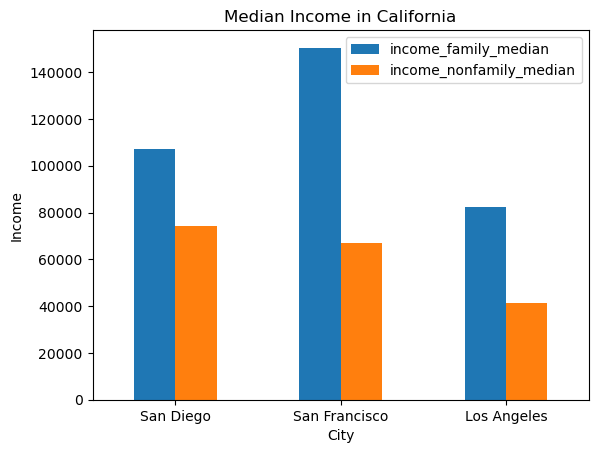

In [18]:
# Median income (household and nonhousehold) for San Diego, San Francisco, and Los Angeles
labels =  ['San Diego', 'San Francisco', 'Los Angeles']
IncomeCA = Top3cities.plot(kind='bar', y=['income_family_median', 'income_nonfamily_median'], stacked=False)
IncomeCA.set_xticklabels(labels)
IncomeCA.legend(loc='upper right')
plt.title('Median Income in California')
plt.xlabel('City')
plt.ylabel('Income')
plt.xticks( rotation=0, ha='center')
plt.savefig("./data/plotMedianIncomeCA.png")


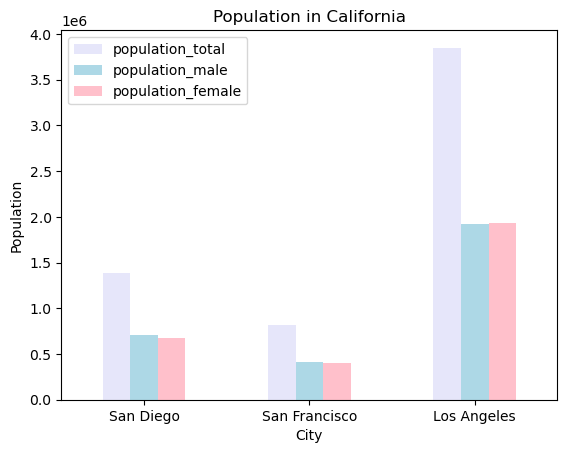

In [19]:
# Total population and gender distribution for three CA cities
labels =  ['San Diego', 'San Francisco', 'Los Angeles']
colors = ['#E6E6FA', '#ADD8E6', 'pink']
PopulationCA= Top3cities.plot(kind='bar', y=['population_total', 'population_male', 'population_female'], color=colors, stacked=False)
PopulationCA.set_xticklabels(labels)
plt.title('Population in California')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=0, ha='center')
plt.savefig("./data/plotPopulationCA.png")

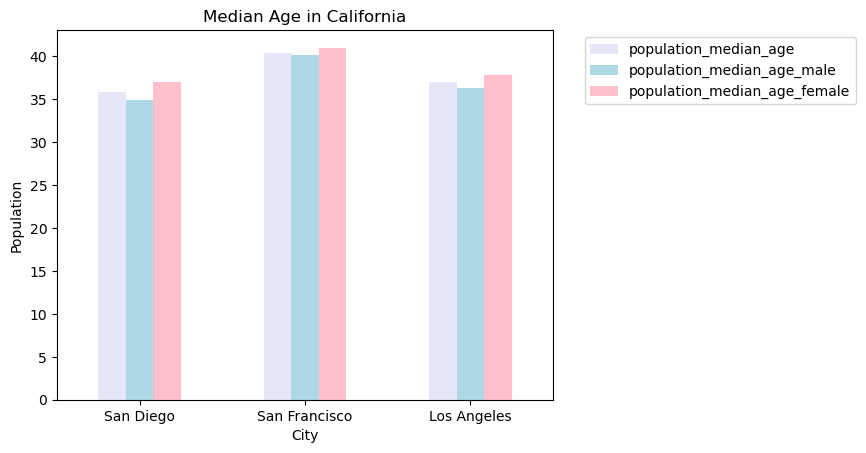

In [20]:
# Median age, female and male for three CA cities
labels =  ['San Diego', 'San Francisco', 'Los Angeles']
colors = ['#E6E6FA', '#ADD8E6', 'pink']
AgeCA= Top3cities.plot(kind='bar', y=['population_median_age', 'population_median_age_male', 'population_median_age_female'], color=colors, stacked=False)
AgeCA.set_xticklabels(labels)
AgeCA.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Median Age in California')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=0, ha='center')
plt.savefig("./data/plotAgeCA.png")

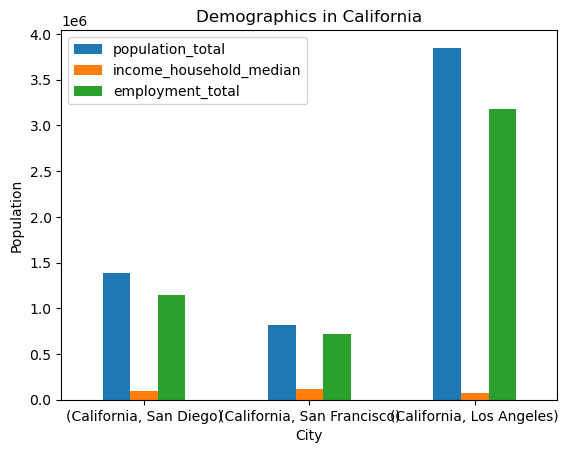

In [21]:
# Demographics in California Summary
Top3cities.plot(kind='bar', y=['population_total', 'income_household_median', 'employment_total'], stacked=False)
plt.title('Demographics in California')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=0, ha='center')
plt.savefig("./data/plotPopCaliCitiesDemo.png")

In [22]:
# Filter tailState
tailState= Summary_df.loc['Mississippi', ['population_total', 'population_male', 'population_female']]
tailState

population_total     52871.333333
population_male      25063.333333
population_female    27808.000000
Name: Mississippi, dtype: float64

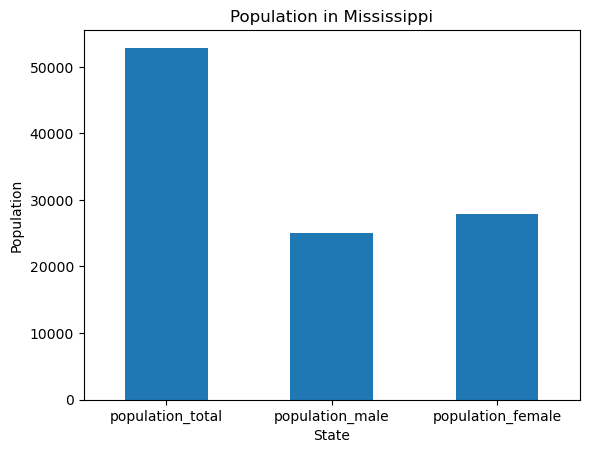

In [23]:
tailState.plot(kind='bar', y=['population_total', 'population_male',
       'population_female'], stacked=True)
plt.title('Population in Mississippi')
plt.xlabel('State')
plt.ylabel('Population')
plt.xticks(rotation=0, ha='center')
plt.savefig("./data/plotMississippi.png")

In [24]:
# Filter Cities in tailState
tailcities = SummaryCities_df.loc[['Mississippi'],:]
tailcities

population_total  population_male  population_female   
State       City                                                                
Mississippi Biloxi                49253.0          23362.0            25891.0  \
            Greenville            31363.0          15209.0            16154.0   
            Gulfport              72096.0          35421.0            36675.0   
            Hattiesburg           45704.0          21170.0            24534.0   
            Jackson              149813.0          69597.0            80216.0   
            Meridian              34425.0          16929.0            17496.0   
            Starkville            24652.0          11709.0            12943.0   
            Vicksburg             22832.0          11003.0            11829.0   

                         population_median_age  population_median_age_male   
State       City                                                             
Mississippi Biloxi                        38.5                        37.0  \
            Greenville                    37.9                        34.8   
            Gulfport                      36.7                        37.7   
            Hattiesburg                   29.7                        32.1   
            Jackson                       34.0                        32.0   
            Meridian                      41.0                        38.9   
            Starkville                    27.2                        24.3   
            Vicksburg                     36.5                        35.2   

                         population_median_age_female  population_total_2   
State       City                                                            
Mississippi Biloxi                               38.9             25366.0  \
            Greenville                           40.6             72096.0   
            Gulfport                             36.5             45704.0   
            Hattiesburg                          27.5             20436.0   
            Jackson                              37.0             27715.0   
            Meridian                             43.8             40276.0   
            Starkville                           31.4             37671.0   
            Vicksburg                            39.1             23999.0   

                         population_18_to_24  population_25_to_34   
State       City                                                    
Mississippi Biloxi                     593.0               3304.0  \
            Greenville                6912.0              10341.0   
            Gulfport                 10889.0               7407.0   
            Hattiesburg               2277.0               1593.0   
            Jackson                   1744.0               1750.0   
            Meridian                  3449.0               4233.0   
            Starkville                2435.0               4079.0   
            Vicksburg                 1749.0               4873.0   

                         population_35_to_44  ...  income_household_median   
State       City                              ...                            
Mississippi Biloxi                    4601.0  ...                  51351.0  \
            Greenville                9683.0  ...                  39022.0   
            Gulfport                  4210.0  ...                  43066.0   
            Hattiesburg               2602.0  ...                  40080.0   
            Jackson                   4741.0  ...                  35070.0   
            Meridian                  6310.0  ...                  31032.0   
            Starkville                5580.0  ...                  26759.0   
            Vicksburg                 2479.0  ...                  35419.0   

                         income_family_median  income_nonfamily_median   
State       City                                                         
Mississippi Biloxi                   10357

In [25]:
# Filter tail 3 cities in topState
Tail3cities = tailcities.loc['Mississippi', ['Jackson', 'Hattiesburg', 'Gulfport'], :]
Tail3cities

population_total  population_male  population_female   
State       City                                                                
Mississippi Jackson              149813.0          69597.0            80216.0  \
            Hattiesburg           45704.0          21170.0            24534.0   
            Gulfport              72096.0          35421.0            36675.0   

                         population_median_age  population_median_age_male   
State       City                                                             
Mississippi Jackson                       34.0                        32.0  \
            Hattiesburg                   29.7                        32.1   
            Gulfport                      36.7                        37.7   

                         population_median_age_female  population_total_2   
State       City                                                            
Mississippi Jackson                              37.0             27715.0  \
            Hattiesburg                          27.5             20436.0   
            Gulfport                             36.5             45704.0   

                         population_18_to_24  population_25_to_34   
State       City                                                    
Mississippi Jackson                   1744.0               1750.0  \
            Hattiesburg               2277.0               1593.0   
            Gulfport                 10889.0               7407.0   

                         population_35_to_44  ...  income_household_median   
State       City                              ...                            
Mississippi Jackson                   4741.0  ...                  35070.0  \
            Hattiesburg               2602.0  ...                  40080.0   
            Gulfport                  4210.0  ...                  43066.0   

                         income_family_median  income_nonfamily_median   
State       City                                                         
Mississippi Jackson                  111133.0                  41723.0  \
            Hattiesburg              108605.0                  44707.0   
            Gulfport                  55430.0                  46603.0   

                         earnings_median  employment_total  employment_male   
State       City                                                              
Mississippi Jackson              24206.0           20003.0          44032.0  \
            Hattiesburg          21220.0           26947.0          14989.0   
            Gulfport             31429.0           22607.0          24524.0   

                         employment_female  occupancy_status_total   
State       City                                                     
Mississippi Jackson                52021.0                 74637.0  \
            Hattiesburg            16480.0                 21031.0   
            Gulfport               22829.0                 33401.0   

                         occupancy_status_occupied  occupancy_status_vacant  
State       City                                                             
Mississippi Jackson                        62140.0                  12497.0  
            Hattiesburg                    19273.0                   1758.0  
            Gulfport                       29385.0                   4016.0  

[3 rows x 23 columns]

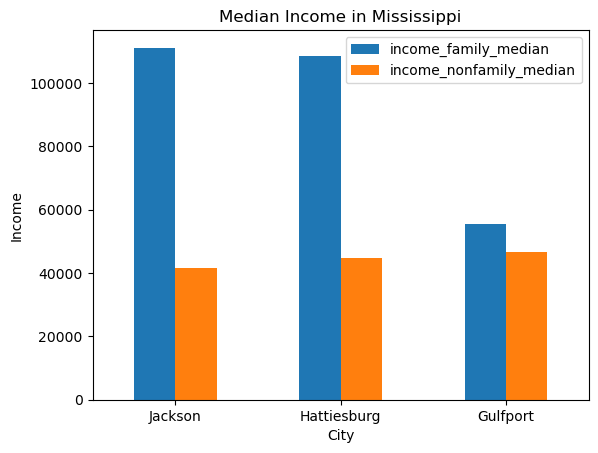

In [26]:
# Median income (household and nonhousehold) for Jackson, Hattiesburg, and Gulfport
labels =  ['Jackson', 'Hattiesburg', 'Gulfport']
IncomeMS = Tail3cities.plot(kind='bar', y=['income_family_median', 'income_nonfamily_median'], stacked=False)
IncomeMS.set_xticklabels(labels)
IncomeMS.legend(loc='upper right')
plt.title('Median Income in Mississippi')
plt.xlabel('City')
plt.ylabel('Income')
plt.xticks( rotation=0, ha='center')
plt.savefig("./data/plotMedianIncomeMS.png")

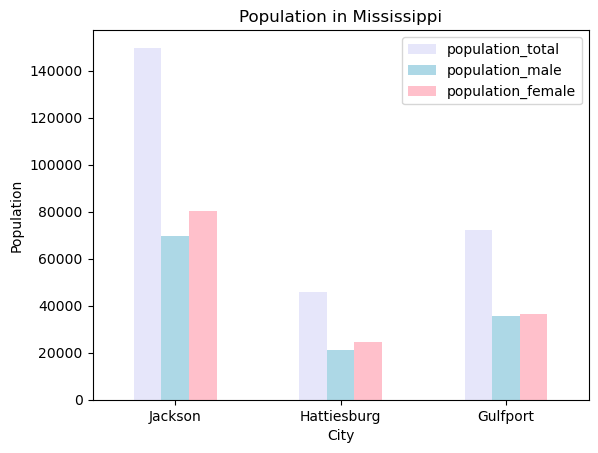

In [27]:
# Total population and gender distribution for three MS cities
labels =  ['Jackson', 'Hattiesburg', 'Gulfport']
colors = ['#E6E6FA', '#ADD8E6', 'pink']
PopulationMS= Tail3cities.plot(kind='bar', y=['population_total', 'population_male', 'population_female'], color=colors, stacked=False)
PopulationMS.set_xticklabels(labels)
plt.title('Population in Mississippi')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=0, ha='center')
plt.savefig("./data/plotPopulationMS.png")

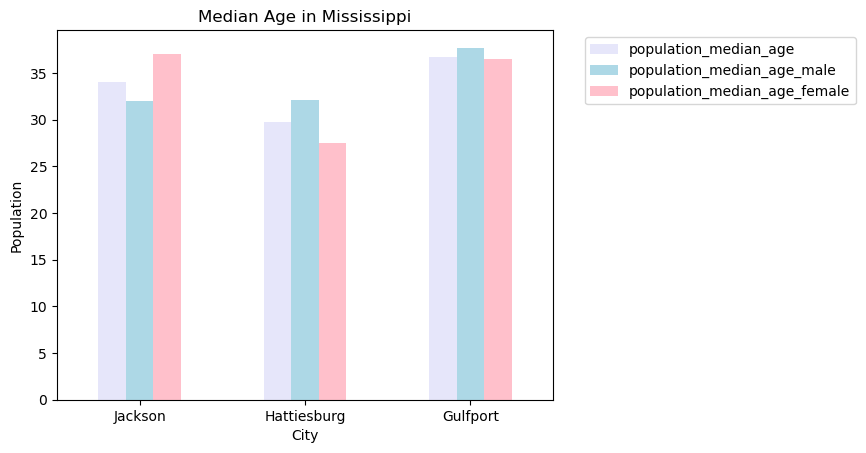

In [28]:
# Median age, female and male for three MS cities
labels =  ['Jackson', 'Hattiesburg', 'Gulfport']
colors = ['#E6E6FA', '#ADD8E6', 'pink']
AgeMS= Tail3cities.plot(kind='bar', y=['population_median_age', 'population_median_age_male', 'population_median_age_female'], color=colors, stacked=False)
AgeMS.set_xticklabels(labels)
AgeMS.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Median Age in Mississippi')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=0, ha='center')
plt.savefig("./data/plotAgeMS.png")

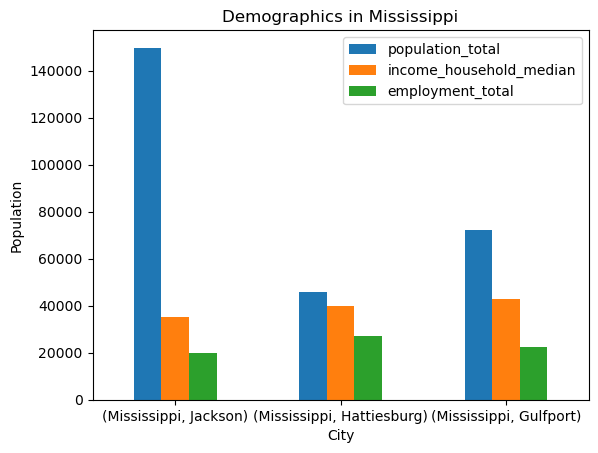

In [29]:
# Demographics In Mississippi Summary
Tail3cities.plot(kind='bar', y=['population_total', 'income_household_median', 'employment_total'], stacked=False)
plt.title('Demographics in Mississippi')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=0, ha='center')
plt.savefig("./data/plotPopMissCitiesDemo.png")

Text(0, 0.5, 'Population')

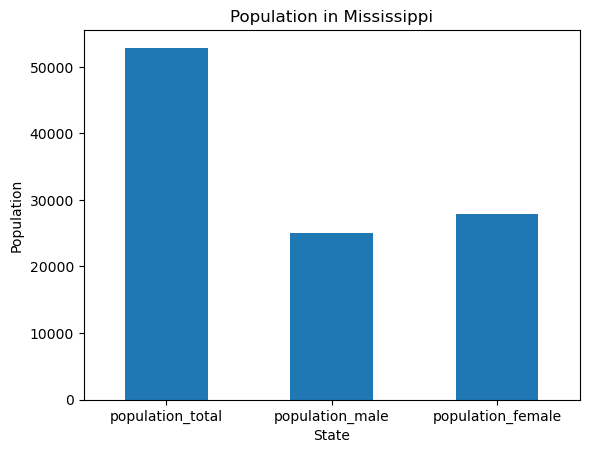

In [30]:
# Population in Mississipi
tailState.plot(kind='bar', y=['population_total', 'population_male',
       'population_female'], stacked=True)
plt.title('Population in Mississippi')
plt.xlabel('State')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Population')

Text(0, 0.5, 'Income Household')

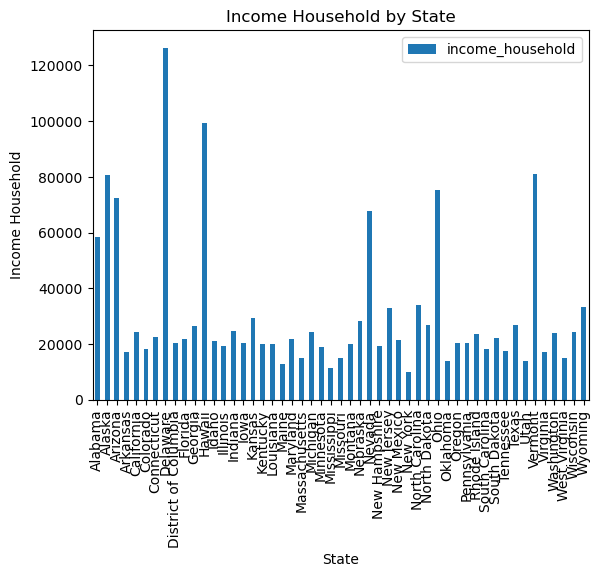

In [31]:
# Income by State
Summary_df.plot(kind='bar', y=['income_household'], stacked=True)
plt.title('Income Household by State')
plt.xlabel('State')
plt.ylabel('Income Household')



Text(0, 0.5, 'Income Houshold')

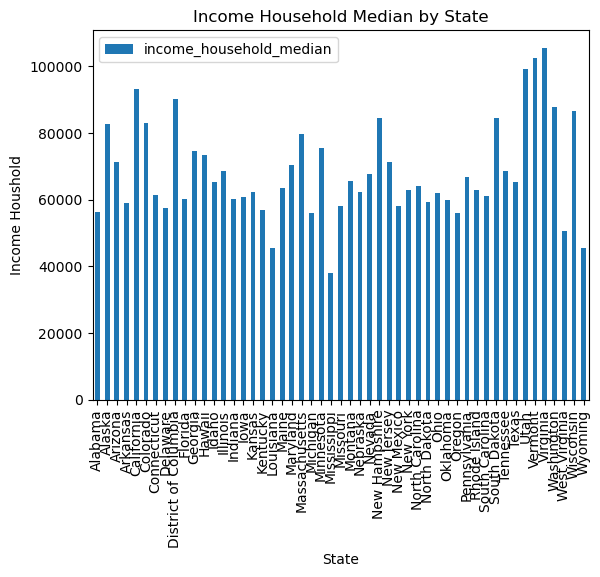

In [32]:
# Income by State
Summary_df.plot(kind='bar', y=['income_household_median'], stacked=True)
plt.title('Income Household Median by State')
plt.xlabel('State')
plt.ylabel('Income Houshold')

Text(0, 0.5, 'Employment')

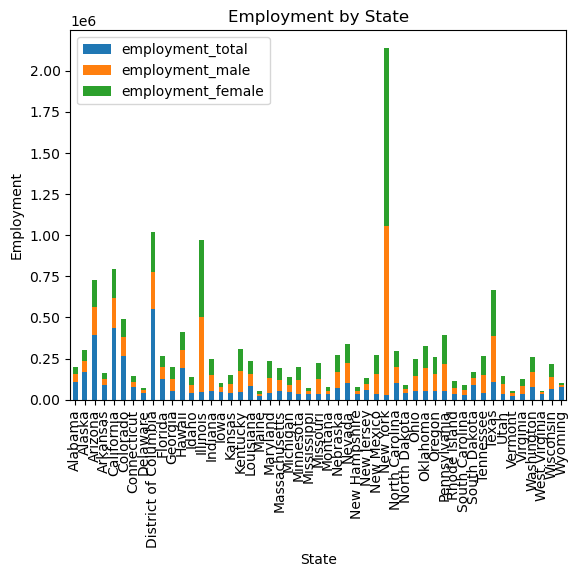

In [34]:
# Employment by State
Summary_df.plot(kind='bar', y=['employment_total',
       'employment_male', 'employment_female'], stacked=True)
plt.title('Employment by State')
plt.xlabel('State')
plt.ylabel('Employment')

Text(0, 0.5, 'Occupancy')

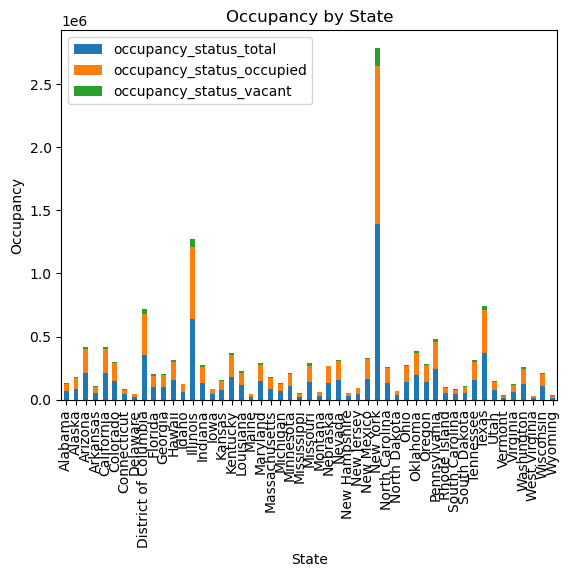

In [35]:
# Occupancy bu State
Summary_df.plot(kind='bar', y=['occupancy_status_total',
       'occupancy_status_occupied', 'occupancy_status_vacant'], stacked=True)
plt.title('Occupancy by State')
plt.xlabel('State')
plt.ylabel('Occupancy')